# ÜSKÜDAR ÜNİVERSİTESİ

# Yapay Sinir Ağları Dersi

# Ara Sınav Ödevi – MLP Sınıflandırma Projesi + XAI (SHAP) Analizi


    # Breast Cancer Wisconsin veri setini kullandım.
    # https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download
    # GITHUB Linki ; https://github.com/cis2101-ctrl/YSA

In [9]:
# =========================================================
## Breast Cancer Wisconsin data setini indirip import ettim.

# 1. VERİ SETİNİN YÜKLENMESİ ve datayı dataframe ile gösterdin
# =========================================================

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_wine
dataset = pd.read_csv("/data01/Userbooks/62679/Postman/breast-cancer[1].csv")
dataset.drop_duplicates(keep = False, inplace = True)
dataset.dropna()
dataset = pd.DataFrame(dataset, index=None)
(dataset)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# =========================================================
# 1. VERİ SETİNİN YÜKLENMESİ
# =========================================================

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer, load_wine



# Veri seti seçtim yukardan
data = load_breast_cancer()

if dataset == "True":
    data = load_breast_cancer()
else:
    data = load_wine()

X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

print("X : ", X)
print("y : ", y)

print("İlk 5 satır:")
X.head()

X :       mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 2. Veri Seti Kalite Kontrolleri

In [14]:
# =========================================================
# 2. VERİ KALİTE KONTROLLERİ
'''
2. Veri Seti Kalite Kontrolleri
2.1 Eksik Değer Analizi
•	Her sütunda missing value kontrolü yapınız.
•	Eksik değer varsa uygun yöntemle doldurunuz.
2.2 Aykırı Değer (Outlier) Analizi
Aşağıdakilerden en az birini uygulayınız:
•	IQR yöntemi
•	Z-score analizi
•	Boxplot incelemesi
2.3 Veri Tipi ve Dağılım İncelemesi
•	Sayısal / kategorik değişken sayılarını raporlayın.
•	Sütunların dtype bilgilerini gösterin.
'''
# =========================================================

# 2.1 Eksik değer analizi
print("Eksik değer sayıları:")
print(X.isnull().sum())

# Eksik değer doldurma (gerekirse)
X = X.fillna(X.mean())

# 2.2 Aykırı değer analizi – IQR yöntemi
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
outliers = ((X < (Q1 - 1.5*IQR)) | (X > (Q3 + 1.5*IQR))).sum()
print("\nAykırı değer sayıları:")
print(outliers)

# 2.3 Veri tipi bilgileri
print("\nVeri tipleri:")
print(X.dtypes)

print("\nSayısal sütun sayısı:", X.select_dtypes(include='number').shape[1])

Eksik değer sayıları:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Aykırı değer sayıları:
mean radius                14
mean texture                7
mean perime

In [15]:
# =========================================================
# 3. KEŞİFSEL VERİ ANALİZİ (EDA)
# =========================================================

import seaborn as sns
import matplotlib.pyplot as plt

# 3.1 İstatistiksel özellikler
desc = X.describe().T
desc["median"] = X.median()
desc["Q1"] = X.quantile(0.25)
desc["Q3"] = X.quantile(0.75)
desc

,count,mean,std,min,25%,50%,75%,max,median,Q1,Q3
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000,13.370000,11.700000,15.780000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000,18.840000,16.170000,21.800000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000,86.240000,75.170000,104.100000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000,551.100000,420.300000,782.700000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340,0.095870,0.086370,0.105300
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540,0.092630,0.064920,0.130400
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680,0.061540,0.029560,0.130700
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120,0.033500,0.020310,0.074000
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400,0.179200,0.161900,0.195700
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744,0.061540,0.057700,0.066120


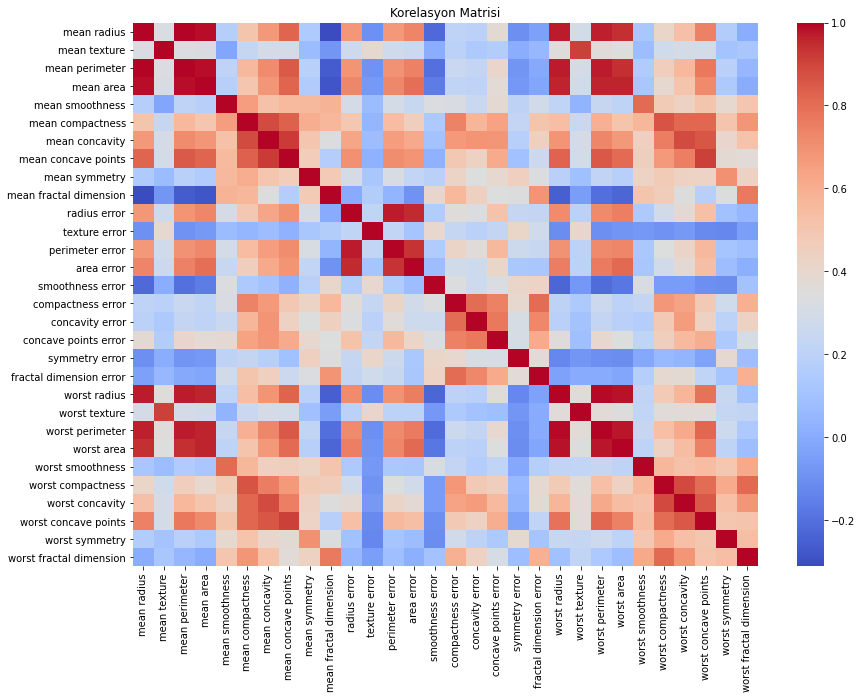


En yüksek korelasyonlu 3 çift:


mean radius      mean perimeter    0.997855
mean perimeter   mean radius       0.997855
worst perimeter  worst radius      0.993708
dtype: float64

In [39]:
# 3.2 Korelasyon matrisi
plt.figure(figsize=(14, 10))
corr = X.corr()
sns.heatmap(corr, cmap="coolwarm")
plt.title("Korelasyon Matrisi")
plt.show()

# En yüksek korelasyonlu 3 çift
corr_values = corr.abs().unstack().sort_values(ascending=False)
top3 = corr_values[corr_values < 1].head(3)
print("\nEn yüksek korelasyonlu 3 çift:")
(top3)

/data01/Anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


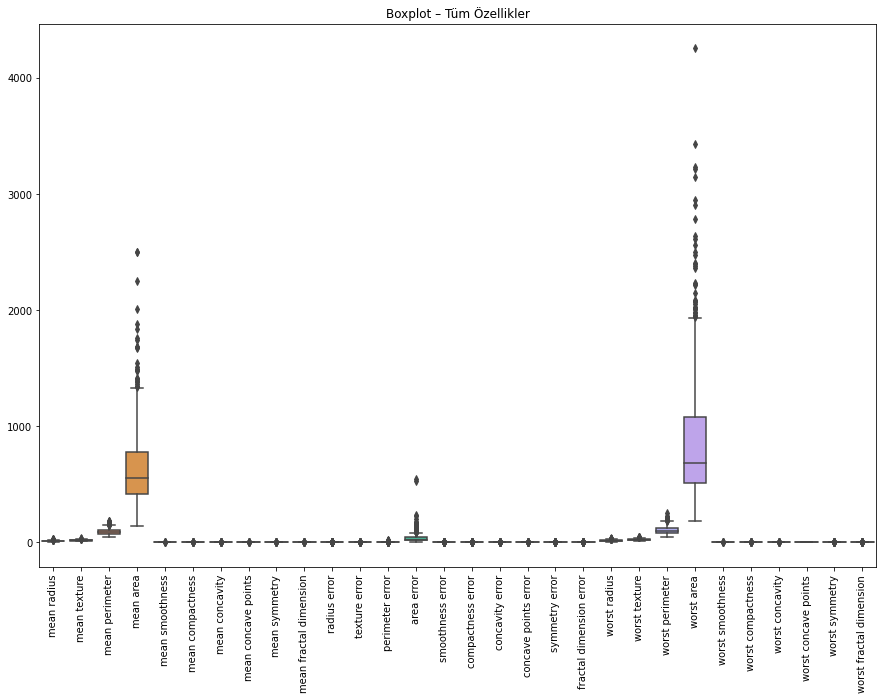

In [17]:
# 3.3 Boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.title("Boxplot – Tüm Özellikler")
plt.xticks(rotation=90)
plt.show()

In [36]:
# =========================================================
# 4. VERİ ÖLÇEKLENDİRME
    # •	StandardScaler (önerilen)
    #•	MinMaxScaler
    # •	RobustScaler

# =========================================================

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


scaler = StandardScaler()

MinMaxScalerr = MinMaxScaler
X_scaled = scaler.fit_transform(X)
X_MinMaxScalerr = MinMaxScaler(X)
X_RobustScaler = RobustScaler().fit(X)




print("\nÖlçeklendirme tamamlandı. X_scaled hazır.",X_scaled)
print("\nÖlçeklendirme tamamlandı. MinMaxScalerr hazır.",X_MinMaxScalerr)
print("\nÖlçeklendirme tamamlandı. X_RobustScaler hazır.",X_RobustScaler)


Ölçeklendirme tamamlandı. X_scaled hazır. [[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]

Ölçeklendirme tamamlandı. MinMaxScalerr hazır. MinMaxScaler(feature_range=     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4 

In [20]:
# =========================================================
# 5. VERİ SETİNİN BÖLÜNMESİ
# =========================================================

from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.67, random_state=42)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (398, 30)
Validation: (56, 30)
Test: (115, 30)


In [2]:
# =========================================================
# 6. FARKLI MLP MODELLERİ
# =========================================================

from sklearn.neural_network import MLPClassifier

models = {
    "Model 1": MLPClassifier(hidden_layer_sizes=(16,), activation="relu", learning_rate_init=0.001, max_iter=500, random_state=42),
    "Model 2": MLPClassifier(hidden_layer_sizes=(32,16), activation="relu", learning_rate_init=0.005, max_iter=500, random_state=42),
    "Model 3": MLPClassifier(hidden_layer_sizes=(64,64), activation="tanh", learning_rate_init=0.001, max_iter=500, random_state=42),
    "Model 4": MLPClassifier(hidden_layer_sizes=(128,64,32), activation="relu", learning_rate_init=0.0005, max_iter=600, random_state=42),
    "Model 5": MLPClassifier(hidden_layer_sizes=(32,), activation="relu", learning_rate_init=0.0001, max_iter=600, random_state=42)
}

print(models)

{'Model 1': MLPClassifier(hidden_layer_sizes=(16,), max_iter=500, random_state=42), 'Model 2': MLPClassifier(hidden_layer_sizes=(32, 16), learning_rate_init=0.005,
              max_iter=500, random_state=42), 'Model 3': MLPClassifier(activation='tanh', hidden_layer_sizes=(64, 64), max_iter=500,
              random_state=42), 'Model 4': MLPClassifier(hidden_layer_sizes=(128, 64, 32), learning_rate_init=0.0005,
              max_iter=600, random_state=42), 'Model 5': MLPClassifier(hidden_layer_sizes=(32,), learning_rate_init=0.0001, max_iter=600,
              random_state=42)}


In [24]:
# =========================================================
#          7. VALIDATION PERFORMANSLARI
# =========================================================

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    probs = model.predict_proba(X_val)[:,1]

    results.append([
        name,
        accuracy_score(y_val, preds),
        precision_score(y_val, preds),
        recall_score(y_val, preds),
        f1_score(y_val, preds),
        roc_auc_score(y_val, probs)
    ])

df_results = pd.DataFrame(results, columns=["Model", "Acc", "Prec", "Recall", "F1", "ROC-AUC"])
df_results

/data01/Anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,Acc,Prec,Recall,F1,ROC-AUC
0,Model 1,0.964286,0.942857,1.000000,0.970588,0.990777
1,Model 2,0.946429,0.941176,0.969697,0.955224,0.982872
2,Model 3,0.964286,0.969697,0.969697,0.969697,0.992095
3,Model 4,0.946429,0.941176,0.969697,0.955224,0.985507
4,Model 5,0.964286,0.942857,1.000000,0.970588,0.994730


En iyi model: Model 1
Accuracy: 0.991304347826087
Precision: 1.0
Recall: 0.9866666666666667
F1: 0.9932885906040269
AUC: 1.0


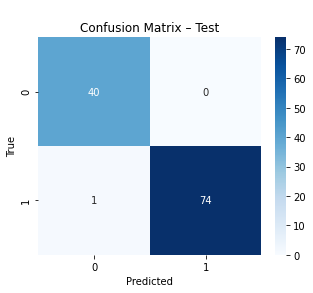

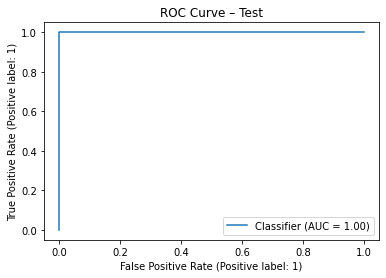

In [38]:
# =========================================================
# 8. EN İYİ MODELİN TEST DEĞERLENDİRMESİ
    #8.1 Performans Metrikleri
        #•	Accuracy
        #•	Precision
        #•	Recall
        #•	F1-score
        #•	ROC-AUC
    #8.2 Confusion Matrix
        #•	seaborn heatmap ile çiziniz.
    #8.3 ROC Eğrisi
        #•	ROC curve + AUC değeri

# =========================================================

best_model_name = df_results.sort_values("F1", ascending=False)["Model"].iloc[0]
best_model = models[best_model_name]

print("En iyi model:", best_model_name)

best_model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix, RocCurveDisplay

preds = best_model.predict(X_test)
probs = best_model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, preds))
print("Precision:", precision_score(y_test, preds))
print("Recall:", recall_score(y_test, preds))
print("F1:", f1_score(y_test, preds))
print("AUC:", roc_auc_score(y_test, probs))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap="Blues", fmt="d")
plt.title("\nConfusion Matrix – Test")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ROC Curve
RocCurveDisplay.from_predictions(y_test, probs)
plt.title("ROC Curve – Test")
plt.show()

In [27]:
# =========================================================

# 9. OPTUNA HİPERPARAMETRE OPTİMİZASYONU
    ## 9.1 Optuna Study Tanımı
    ## 9.2 Optuna Arama Aralıkları
    ## 9.3 Eğitim Döngüsü
    ## 9.4 En İyi Trial’ın Raporlanması

# =========================================================

import optuna
from sklearn.metrics import f1_score
import urllib3
import logging

urllib3.disable_warnings()

logging.captureWarnings(True)

for name in logging.Logger.manager.loggerDict.keys():
    logging.getLogger(name).setLevel(logging.CRITICAL)
    
    
def objective(trial):
    h1 = trial.suggest_int("h1", 16, 256)
    h2 = trial.suggest_int("h2", 8, 128)
    lr = trial.suggest_loguniform("lr", 1e-5, 1e-1)
    alpha = trial.suggest_loguniform("alpha", 1e-6, 1e-2)
    activation = trial.suggest_categorical("activation", ["relu", "tanh"])
    solver = trial.suggest_categorical("solver", ["adam", "sgd"])
    batch = trial.suggest_categorical("batch", [16, 32, 64, 128])

    clf = MLPClassifier(
        hidden_layer_sizes=(h1, h2),
        learning_rate_init=lr,
        alpha=alpha,
        activation=activation,
        solver=solver,
        batch_size=batch,
        max_iter=600,
        random_state=42
    )

    clf.fit(X_train, y_train)
    preds = clf.predict(X_val)
    return f1_score(y_val, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)

print("En iyi değerler:")
print(study.best_params)

En iyi değerler:
{'h1': 244, 'h2': 125, 'lr': 0.0006843457161683289, 'alpha': 1.484649060071643e-05, 'activation': 'tanh', 'solver': 'sgd', 'batch': 16}


  0%|          | 0/50 [00:00<?, ?it/s]

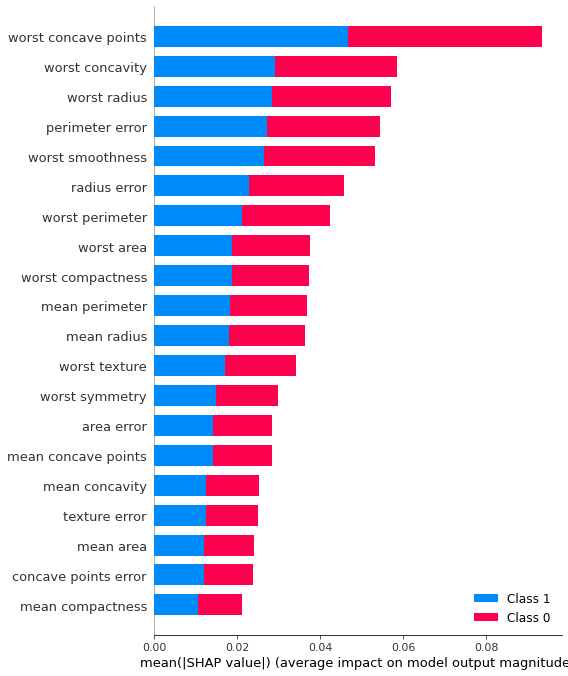

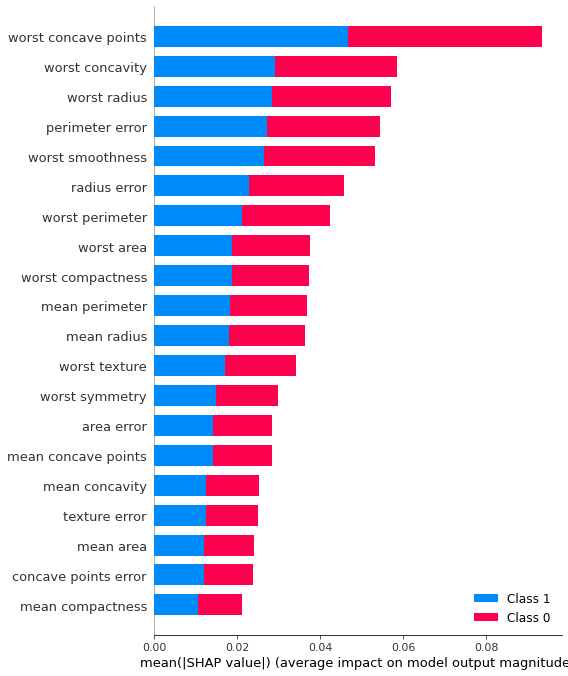

In [28]:
# =========================================================
#               10. SHAP ANALİZİ (XAI)
# =========================================================

import shap

# Uyarı: İş bilgisayarımda ki Kernel büyük boyutta yavaş çalışabilir , dolayısıyla burada örnekleme yapıyorum.

# 10.1 En iyi manuel model için SHAP
sample_background = X_train[:100]
sample_val = X_val[:50]

explainer = shap.KernelExplainer(best_model.predict_proba, sample_background)
shap_values = explainer.shap_values(sample_val)

shap.summary_plot(shap_values, sample_val, feature_names=X.columns)
shap.summary_plot(shap_values, sample_val, feature_names=X.columns, plot_type="bar")

  0%|          | 0/50 [00:00<?, ?it/s]

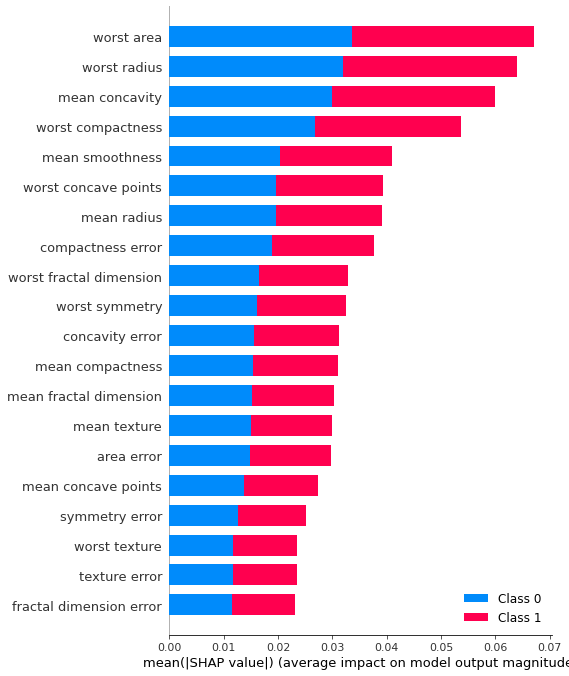

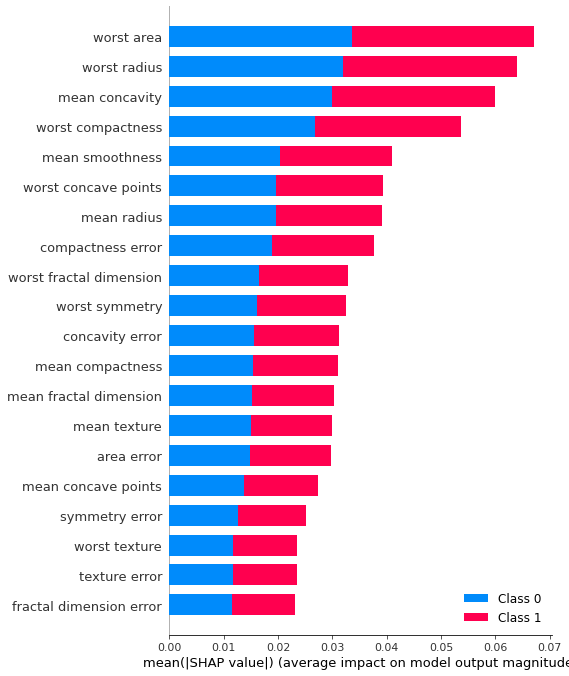

In [29]:
# =========================================================
#            10.2 Optuna En İyi Model SHAP
# =========================================================

best_params = study.best_params
opt_model = MLPClassifier(
    hidden_layer_sizes=(best_params["h1"], best_params["h2"]),
    learning_rate_init=best_params["lr"],
    alpha=best_params["alpha"],
    activation=best_params["activation"],
    solver=best_params["solver"],
    batch_size=best_params["batch"],
    max_iter=600,
    random_state=42
)
opt_model.fit(X_train, y_train)

expl_opt = shap.KernelExplainer(opt_model.predict_proba, sample_background)
opt_shap = expl_opt.shap_values(sample_val)

shap.summary_plot(opt_shap, sample_val, feature_names=X.columns)
shap.summary_plot(opt_shap, sample_val, feature_names=X.columns, plot_type="bar")

# Force plot (tek örnek gösteriyorum)
shap.force_plot(expl_opt.expected_value[1], opt_shap[1][0,:], sample_val[0], feature_names=X.columns)